# Week3 - Homework

Write a rule based predictor for the dataset below. 

Choose one of the following datasets and do your EDA. 
Test your assumptions. 

Finally write your code in `predict_one` function. 

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'

df = pd.read_csv(us_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36277 entries, 0 to 36276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    36277 non-null  object
 1   gender  36277 non-null  object
dtypes: object(2)
memory usage: 567.0+ KB


In [2]:
#using value_counts() function to count the values
df.gender.value_counts()

F    21789
M    14488
Name: gender, dtype: int64

Not balanced! For simplicity, let's create a sub sample that will contains equal F and M.

In [3]:
#finding the min count of a gender whether M or F
min_count = min(df['gender'].value_counts())

#using sample method to get a balanced sample space so that we do not get biased data 
df_f = df[df['gender'] == 'F'].sample(min_count, random_state=42)
df_m = df[df['gender'] == 'M'].sample(min_count, random_state=42)

df = pd.concat([df_f, df_m]).reset_index(drop=True)

In [4]:
#Using value_counts() to count and verify both gender count
df.gender.value_counts()

F    14488
M    14488
Name: gender, dtype: int64

In [5]:
#Using head function to get a preview of data 
df.head()

,name,gender
0,Brennen,F
1,Chikaima,F
2,Zoejane,F
3,Teegan,F
4,Alanda,F


## Part1:

Run experiments to select which rules are good seperator for gender.

### Two examples:

# Trying Suffixes 

# Chekcing last letter to find a pattern

Text(0.5, 1.0, 'Distribution of Names by Last Letter and Gender')

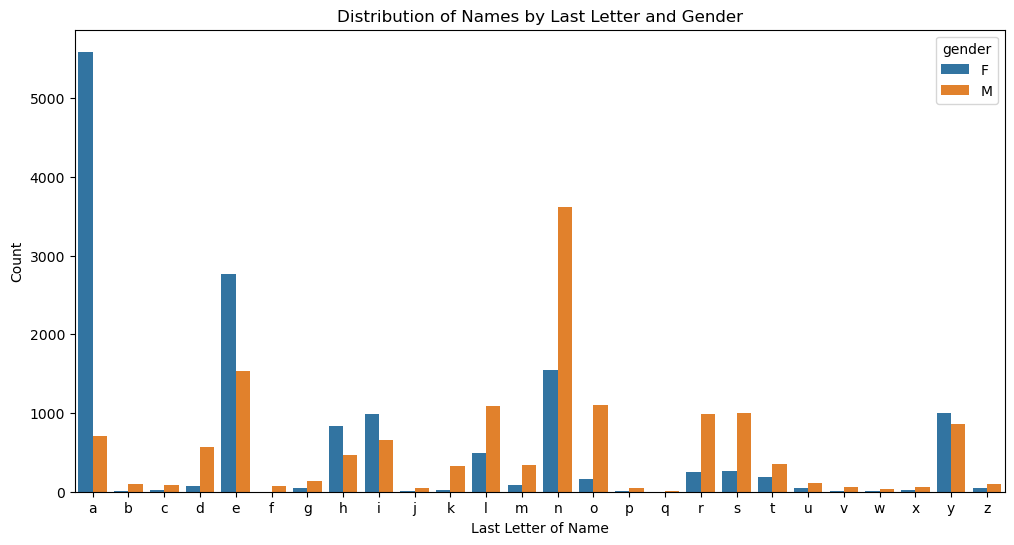

In [6]:
# Extracting the last letter of each name 
df['last_letter'] = df['name'].str[-1].str.lower()

# Creating a count plot that shows the distribution of names by last letter, categorized by gender
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='last_letter', hue='gender', order=sorted(df['last_letter'].unique()))

# X axis as alphabet and Y axis has count of ocurrences
plt.xlabel('Last Letter of Name')
plt.ylabel('Count')
plt.title('Distribution of Names by Last Letter and Gender')


# Interpretation
Taking the last letters that have significant difference i.e a for women and n for men 


# Chekcing last 2 letters to find a pattern

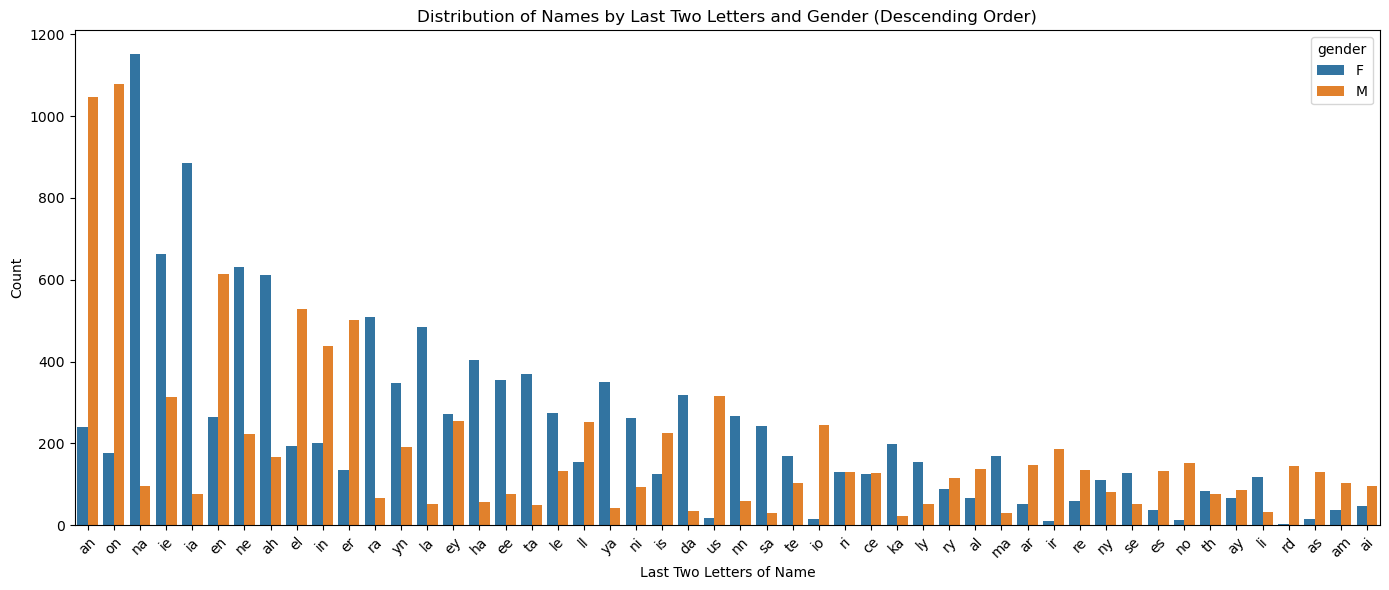

In [7]:
# Extract the last two letters of each name and add it as a new column
df['last_two_letters'] = df['name'].str[-2:].str.lower()

# Using value_counts to count the occurrences of the last two letters and sort in descending order
last_two_letter_counts = df['last_two_letters'].value_counts().nlargest(50)
df_top_last_two = df[df['last_two_letters'].isin(last_two_letter_counts.index)]

# Creating a plot with count on y axis and last two most common letters on x axis 
plt.figure(figsize=(14, 6))
sns.countplot(data=df_top_last_two, x='last_two_letters', hue='gender', order=last_two_letter_counts.index)
plt.xlabel('Last Two Letters of Name')
plt.ylabel('Count')
plt.title('Distribution of Names by Last Two Letters and Gender (Descending Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Interpretation
using last two letters that have significant difference 
Women:
1. na
2. ia
3. ie
4. ah
5. ne
6. ra
7. la 
8. ee
9. ta
10. ha
11. ta
12. ya 

Men
1. on
2. an
3. en
4. er
5. us
6. io


# Chekcing last 3 letters to find a pattern

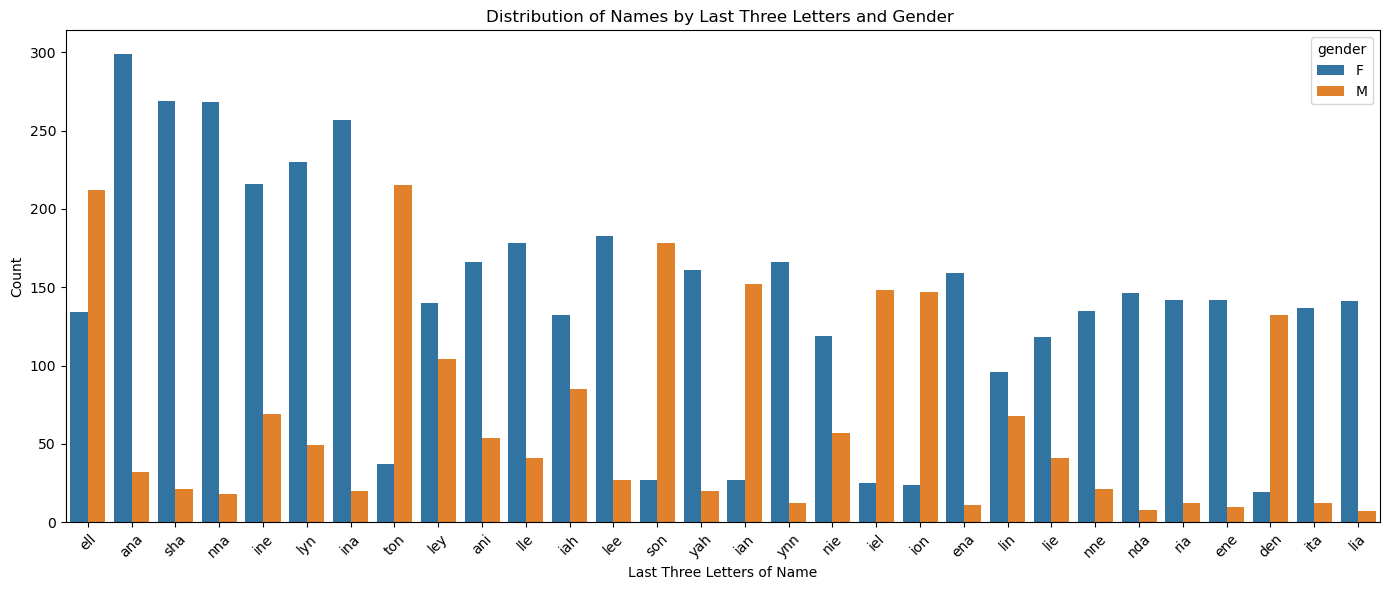

In [8]:
# Filtering last three letters and using lower function to convert it to lowercase so that we get the top 30 most frequent suffixes
df['last_three_letters'] = df['name'].str[-3:].str.lower()
top_last_three_letters = df['last_three_letters'].value_counts().nlargest(30)
df_top_last_three = df[df['last_three_letters'].isin(top_last_three_letters.index)]

# Creating a plot with count on y-axis and last three most common suffixes on x-axis
plt.figure(figsize=(14, 6))
sns.countplot(data=df_top_last_three, x='last_three_letters', hue='gender',order=top_last_three_letters.index)
plt.xlabel('Last Three Letters of Name')
plt.ylabel('Count')
plt.title('Distribution of Names by Last Three Letters and Gender ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Interpretation
# Women:
1. ana
2. sha
3. nna
4. ine
5. lyn
6. ina
7. ani
8. lle
9. lee
10. yah
11. ynn
12. ena
13. nne
14. nda
15. ene


# Checking Prefixes  

# Since first letter does not give any conclusive pattern. Cheking first 4 letters to find a pattern 

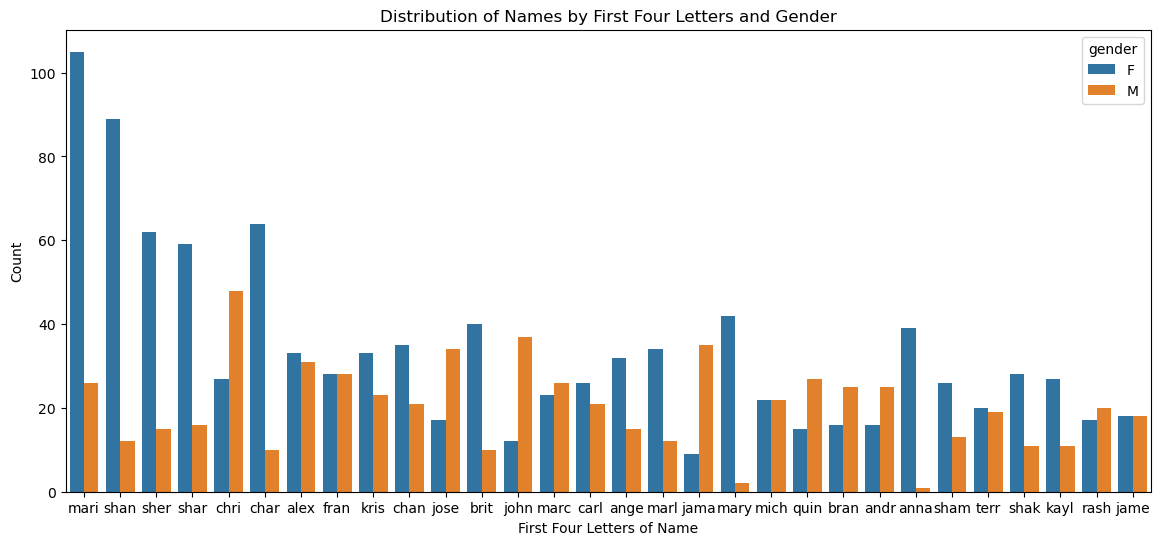

In [9]:
# Filtering first four letters and using lower function to convert it to lowercase. Using value_count function to get count of top 30  
df['first_four_letters'] = df['name'].str[:4].str.lower()
top_first_four_letters = df['first_four_letters'].value_counts().nlargest(30).index
df_top_first_four = df[df['first_four_letters'].isin(top_first_four_letters)]
letter_counts_first_four = df_top_first_four.groupby(['first_four_letters', 'gender']).size().unstack().fillna(0)
letter_counts_first_four['total'] = letter_counts_first_four.sum(axis=1)

# Sorting them in descending order to get a clear view 
sorted_first_four_letters = letter_counts_first_four.sort_values(by='total', ascending=False).index

# Creating a plot with count on y-axis and first 4 letters on x-axis
plt.figure(figsize=(14, 6))
sns.countplot(data=df_top_first_four, x='first_four_letters', hue='gender', order=sorted_first_four_letters)
plt.xlabel('First Four Letters of Name')
plt.ylabel('Count')
plt.title('Distribution of Names by First Four Letters and Gender')
plt.show()


# Interpretation 
# Women 
 1. mari   
 2. mary
 3. char
 4. shar
5.  sher
6. shan


# Checking if there's a pattern for the first 2 letters 

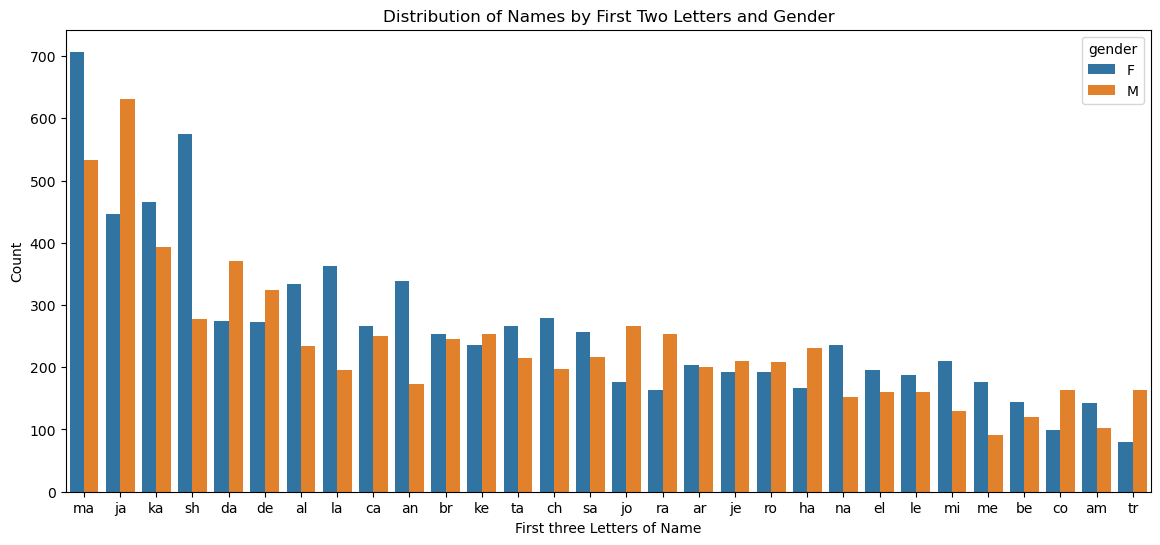

In [10]:
# Filtering first two letters and using lower function to convert it to lowercase. Using value_count function to get count of top 30
df['first_two_letters'] = df['name'].str[:2].str.lower()
top_first_two_letters = df['first_two_letters'].value_counts().nlargest(30).index
df_top_first_two = df[df['first_two_letters'].isin(top_first_two_letters)]
letter_counts = df_top_first_two.groupby(['first_two_letters', 'gender']).size().unstack().fillna(0)
letter_counts['total'] = letter_counts.sum(axis=1)

# Sorting the top first two letters by total count in descending order for better visibility 
sorted_first_two_letters = letter_counts.sort_values(by='total', ascending=False).index

# Creating a plot with count on y-axis and first 2 letters on x-axis
plt.figure(figsize=(14, 6))
sns.countplot(data=df_top_first_two, x='first_two_letters', hue='gender', order=sorted_first_two_letters)
plt.xlabel('First three Letters of Name')
plt.ylabel('Count')
plt.title('Distribution of Names by First Two Letters and Gender')
plt.show()

# Interpretation 
It is very difficult to find a conclusive prefix that gives a good difference apart from some like sh

## Part2

Write the inference function based on the findings...

In [15]:
#creating a function that takes a list of strings for prefixes and suffixes and checks the input accordingly. Returns F if available in list and M otherwise 
def predict_one(name): # <-- (Don't change the function signature) DO NOT CHANGE THIS LINE
    # write your codes below this line....
     #using prefix suffix rules based on the deductions of the above visualization and some from general understanding of names
        # female suffixes
    female_suffixes = ['ana', 'ani', 'ena', 'ene', 'ina', 'ine', 'ita', 'lee', 
                       'lyn', 'lynn','nda', 'nie', 'nna', 'sha', 'yah', 'ynn', 'elle', 'ette', 'ita', 'lle', 'nie', 'nne', 'ria', 
                       'ette', 'ria', 'a',"na", "ia", "ie", "ah", "ne", "ra", "la", "ee", "ta", "ha", "ya",'e','i','y','h']
        
         #female prefixes
    female_prefixes = ['anna', 'mary', 'char', 'shar', 'sher', 'shan', 'mari']
    
     # Converting input to lower case and checking for female prefixes and suffixes
    for prefix in female_prefixes:
        if name.lower().startswith(prefix):
             return 'F'
    for suffix in female_suffixes:
        if name.lower().endswith(suffix):
            return 'F'
        
    # Default to 'M' if no specific rule matches
    return 'M'
    


print(predict_one('Janani'))

F


If the outputabove  is F it denotes that the prediction for the name is Female and If it is M then its Male

In [14]:
#checking every name in the prediction function and the actual gender to find accuracy  
## DO NOT CHANGE ANYTHING IN THIS CELL!!!
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7536927112092766


# The Output accuracy for the prediction function is 75.3%

## Part3 


Write the above function in any other language other than python with a small demo.

Or preferably in javascript as it is easy to present. 

Here is the starter code. 

* Open a new file in week3 folder name it `name_predictor.html`

* Fill the `predictOne` function based on the function above

* Save and double click on the html file to test it.


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Simple Name Gender Predictor</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        /*Container for providing structure details like width padding */
        .container {
            max-width: 500px;
            margin: auto;
            padding: 20px;
            border: 1px solid #ccc;
            border-radius: 10px;
        }
        /* Centering the header text */
        h2 {
            text-align: center;
        }
        .result {
            margin-top: 20px;
            font-size: 1.2em;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <div class="container">
        <!-- header -->
        <h2>Guess the Gender of a Name</h2>

        <!-- Input box to type name -->
        <label for="nameInput">Enter a name:</label><br><br>
        <input type="text" id="nameInput" placeholder="Type a name here" style="width: 100%; padding: 10px; font-size: 16px;"><br><br>
        
        <!-- Button to predict -->
        <button onclick="guessGender()">Predict Gender</button>

        <!-- Prediction result -->
        <div id="result" class="result"></div>
    </div>

    <script>
        // Function to handle the click event and predict the gender
        function guessGender() {
            // Get the name from the input box
            const enteredName = document.getElementById('nameInput').value;
            // Call the function that guesses the gender
            const predictedGender = predictOne(enteredName);
            // Display the output
            document.getElementById('result').innerText = `Predicted Gender: ${predictedGender}`;
        }

        // The function written after analysis of the dataset to predict
        function predictOne(name) {
            //using prefix suffix rules based on the deductions of the above visualization and some from general understanding of names
            
            // female suffixes
            const female_suffixes = ['ana', 'ani', 'ena', 'ene', 'ina', 'ine', 'ita', 'lee', 
                                     'lyn', 'lynn', 'nda', 'nie', 'nna', 'sha', 'yah', 'ynn', 
                                     'elle', 'ette', 'ita', 'lle', 'nie', 'nne', 'ria', 'a', 
                                     'na', 'ia', 'ie', 'ah', 'ne', 'ra', 'la', 'ee', 'ta', 
                                     'ha', 'ya', 'e', 'i', 'y', 'h'];

            // female prefixes
            const female_prefixes = ['anna', 'mary', 'char', 'shar', 'sher', 'shan', 'mari'];

            // Making everything lowercase to avoid case mismatch
            const lowerCaseName = name.toLowerCase();

            // Check for female prefixes
            for (const prefix of female_prefixes) {
                if (lowerCaseName.startsWith(prefix)) {
                    return 'F';
                }
            }

            // Check for female suffixes
            for (const suffix of female_suffixes) {
                if (lowerCaseName.endsWith(suffix)) {
                    return 'F';
                }
            }

            // Default to 'M' if no specific rule matches
            return 'M';
        }
    </script>
</body>
</html>
